# Соединение таблиц

### Объединяем таблицы без операторов

✍ Существует несколько способов соединения таблиц. Мы познакомимся со всеми основными операторами, которые используются для этих нужд, но начнём с простого метода объединения таблиц — без операторов.

Чтобы соединить две таблицы между собой, достаточно записать названия таблиц через запятую в разделе from. Что произойдёт в таком случае?

Попробуйте в Metabase!

Запрос\
SELECT *\
FROM\
    sql.teams,\
    sql.matches


Каждая запись, которая есть в таблице teams, будет соединена с каждой записью в таблице matches.

Это действие также называют декартовым произведением таблиц.

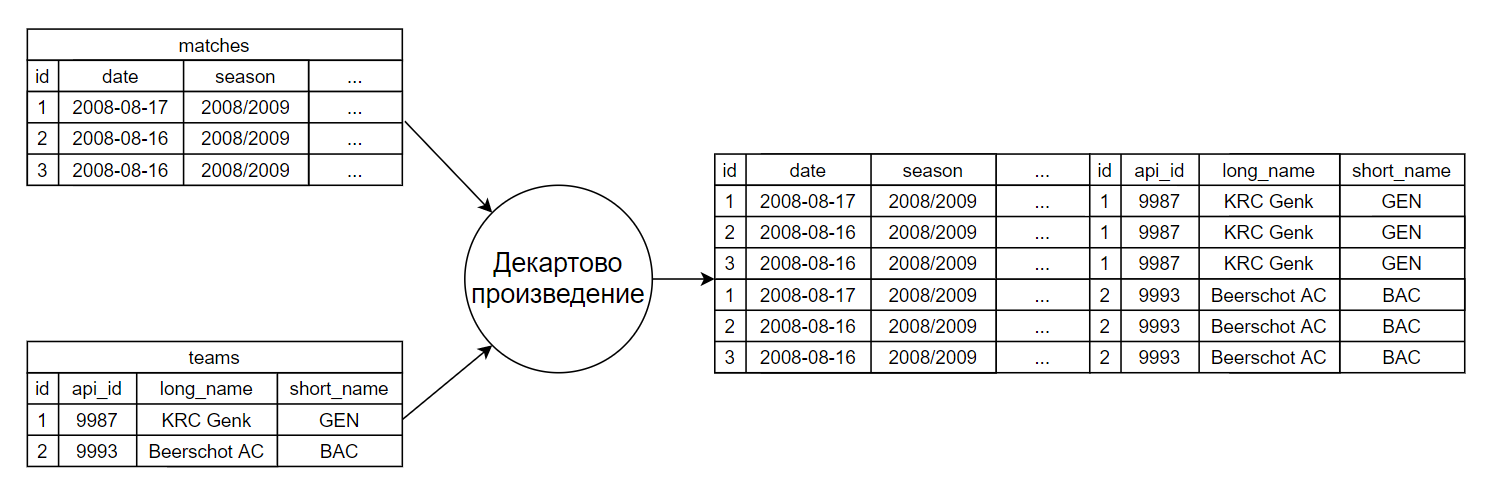

Действительно ли это произведение?

Легко проверить! В исходных таблицах teams и matches было 299 и 25083 записей соответственно. Если соединить каждую запись одной таблицы с каждой записью другой, получится 299 * 25083 записей в итоговой таблице.

В данном случае соединение таблиц не даёт практической пользы: мы получили очень много записей, которые никак не можем интерпретировать, потому что команды не соответствуют матчам.

Давайте исправим это. В таблице teams есть столбец api_id, а таблица matches содержит столбцы home_team_api_id и away_team_api_id — это ключи таблиц, по которым они соединяются.

Ключ — это поле (столбец) в таблице, которое позволяет однозначно идентифицировать запись (строку).

Чтобы соединить таблицы и получить данные о домашней команде по каждому матчу, добавим условие
where home_team_api_id = api_id.

Попробуйте в Metabase!

ЗапросДетализация
SELECT *
FROM
    sql.teams,
    sql.matches
WHERE home_team_api_id = api_id
Аналогично можем получить данные о гостевых командах: необходимо изменить условие на
where away_team_api_id = api_id.

Попробуйте в Metabase!

Запрос\
SELECT *\
FROM\
    sql.teams,\
    sql.matches\
WHERE away_team_api_id = api_id

Итак, мы только что объединили таблицы по ключу.

Вы уже знакомы с ключами по таблице pokemon (там в этой роли выступал столбец id). Ключи нужны для того, чтобы иметь возможность не перепутать между собой различные записи.

→ Например, у нас есть несколько команд с одинаковым названием: Polonia Bytom, Widzew Łódź и Royal Excel Mouscron — хотя это разные команды, с разными id.
Кроме того, как мы уже смогли убедиться, ключи используются для соединения таблиц между собой.

Ключи бывают двух основных типов:

* Primary — первичный ключ — служит для идентификации текущей таблицы и, как правило, идёт первым в списке столбцов. Всегда уникален: повторяющихся значений в основной таблице быть не может.
* Foreign — внешний ключ — представляет собой ссылку на другую таблицу.

Как правило, названия ключей имеют «хвост», который позволяет их идентифицировать: например, _id, _rk, _cd, _pk (от primary_key), _fk (от foreign_key) и другие.

Обратите внимание! В данном датасете ключ api_id таблицы teams может быть использован в разных значениях. Его можно использовать для того, чтобы получить информацию о домашней (home) или гостевой (away) команде.

Вы могли заметить, что в последних двух запросах получилось очень много столбцов. Как и при работе с одиночной таблицей, мы можем выбирать, какие столбцы соединённой таблицы выводить.

С помощью известного нам запроса получим названия команд, игравших домашние матчи, и счёт матчей.

Попробуйте в Metabase!

Запрос\
SELECT \
    long_name, \
    home_team_goals,\
    away_team_goals\
FROM\
    sql.teams,\
    sql.matches\
WHERE home_team_api_id = api_id

и запишем его с использованием JOIN.

 Попробуйте в Metabase!

Запрос\
SELECT \
    long_name,\
    home_team_goals,\
    away_team_goals\
FROM    \
    sql.teams\
JOIN sql.matches on home_team_api_id = api_id

### Синтаксис

Оператор JOIN упрощает процесс соединения таблиц.

Его синтаксис можно представить следующим образом:

SELECT\
        столбец1,\
	столбец2,\
	...\
FROM\
	таблица1\
JOIN таблица2 ON условие

Порядок присоединения таблиц в данном случае не важен — результат будет одинаковым.

С помощью JOIN можно соединить и более двух таблиц.

SELECT\
        столбец1,\
	столбец2,\
	...\
FROM\
	таблица1\
JOIN таблица2 ON условие\
JOIN таблица3 ON условие

В таблицах, которые мы соединяем, могут быть одинаковые названия столбцов.

→ К примеру, столбец id есть и в таблице matches, и в таблице teams. Такой запрос не будет обработан.

 Попробуйте в Metabase!

Запрос\
SELECT\
    id\
FROM \
sql.teams\
    JOIN sql.matches ON home_team_api_id = api_id

В результате должно появиться сообщение об ошибке вроде такого: "... column id is ambiguous ...".

Что же делать в таком случае?

Можно указать, откуда мы хотим запросить данные, записав название таблицы перед столбцом через точку.

Попробуйте в Metabase!

Запрос\
SELECT\
    teams.id\
FROM \
    sql.teams\
JOIN sql.matches ON home_team_api_id = api_id

Можно также выбрать и столбец из таблицы matches.

Запрос\
SELECT\
    matches.id\
FROM \
    sql.teams\
JOIN sql.matches on home_team_api_id = api_id

Зачастую названия таблиц слишком длинные, так что использовать их неудобно.

Упростить обращение к различным таблицам можно, присвоив им сокращённые названия — алиасы (от англ. alias).

Синтаксис для указания алиаса такой же, как и для названия столбца.

SELECT\
        столбец1,\
	столбец2,\
	...\
FROM\
	таблица1 AS короткое_название_1\
JOIN таблица2 AS короткое_название_2 ON условие

Название записывается без пробелов и операторов.

Если необходимо записать название, в котором используются пробелы ("table 1"), то алиас можно обернуть в кавычки.

Важно! Обращаться по такому алиасу придётся также с помощью кавычек.

SELECT\
	"table 1".столбец1,\
	"table 2".столбец2,\
	...\
FROM\
	таблица1 AS "table 1"\
	JOIN таблица2 AS "table 2" ON условие

Использование таких алиасов считается плохой практикой как минимум по причине того, что обращаться с такими алиасами неудобно.

Вместо алиасов с кавычками рекомендуется давать простое короткое название на латинице, без специальных символов и пробелов. Если таблиц немного и все названия начинаются с разных букв, можно присваивать алиасы по первой букве.

Ключевое слово as, как и в названии столбца, можно опустить в большинстве СУБД.

SELECT\
        столбец1 новое_название_столбца,\
	столбец2 новое_название_столбца,\
	...\
FROM\
	таблица1 короткое_название_1\
JOIN таблица2 короткое_название_2 ON условие

Давайте попробуем проделать то же самое для наших таблиц.

ажется, теперь мы можем соединить таблицы между собой и создать своё табло со счётом матчей, как на спортивных сайтах!

Попробуйте в Metabase!

Давайте с помощью запроса SQL получим таблицу, содержащую:

название домашней команды;
количество забитых домашней командой голов;
количество забитых гостевой командой голов;
название гостевой команды.

Запрос\
SELECT\
    h.long_name "домашняя команда",\
    m.home_team_goals "голы домашней команды",\
    m.away_team_goals "голы гостевой команды",\
    a.long_name "гостевая команда" \
FROM\
    sql.matches m\
    JOIN sql.teams h ON m.home_team_api_id = h.api_id\
    JOIN sql.teams a ON m.away_team_api_id = a.api_id

### Фильтрация и агрегатные функции

Принцип построения запроса и порядок операторов такой же, как и с обычной таблицей.

Вспомним его:

SELECT... \
FROM... \
WHERE... \
GROUP BY... \
ORDER BY... \
LIMIT...

#### Фильтрация данных

К соединённым таблицам применимы функции фильтрации данных.

Например, можно вывести id матчей, в которых команда Arsenal была гостевой.

Попробуйте в Metabase!

Запрос\
SELECT \
    m.id\
FROM\
    sql.teams t\
    JOIN sql.matches m ON m.away_team_api_id = t.api_id\
WHERE long_name = 'Arsenal'

Принципиальное отличие фильтрации данных по соединённым таблицам от аналогичного действия по одиночным таблицам заключается в том, что, фильтруя записи одной таблицы, мы также будем фильтровать и записи другой таблицы, поскольку соединённые на уровне запроса таблицы по сути являются единой таблицей.

Например, результат запроса

SELECT \
	m.id id_1,\
	m.season,\
	t.id id_2,\
	t.long_name\
FROM\
	sql.teams t\
JOIN sql.matches m ON m.away_team_api_id = t.api_id

можно разделить на две разные части

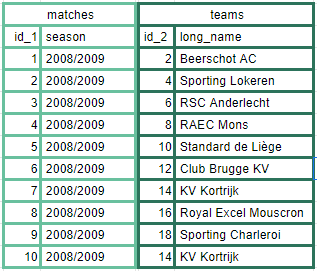

Одна часть — таблица matches с алиасом m, вторая — teams с алиасом t, но после соединения они являются одной таблицей.

Таким образом, если вы отфильтруете данные по одной части таблицы, то другая, соединённая, часть пропадёт вместе с ней.

Также мы можем отфильтровать записи сразу по двум таблицам.

Попробуйте в Metabase!

Например, можно оставить только записи, в которых короткое название домашней команды GEN и матчи сезона 2008/2009.

Запрос\
SELECT *\
FROM    \
    sql.matches m\
    JOIN sql.teams t on t.api_id = m.home_team_api_id\
WHERE\
    t.short_name = 'GEN'\
    AND m.season = '2008/2009'

Агрегация данных

К соединённым таблицам также применимы любые агрегатные функции — самые важные функции для анализа данных.

 Попробуйте в Metabase!

Например, мы можем вывести сумму голов матча, забитых командами, агрегированную по гостевым командам (совокупное количество голов в матче, забитых обеими командами, суммированное в разрезе гостевых команд).

Запрос\
SELECT\
    t.long_name,\
    SUM(m.home_team_goals) + SUM(m.away_team_goals) match_goals\
FROM\
    sql.matches m\
    JOIN sql.teams t ON m.away_team_api_id = t.api_id \
GROUP BY t.id

Обратите внимание! В данном запросе была использована группировка по столбцу id таблицы teams, хотя этот столбец не выводится в запросе. Это необходимо для того, чтобы команды с одинаковым названием, если такие найдутся, не группировались между собой. Группировка по названию команды в данном запросе будет неверной, так как есть несколько команд с одинаковым полным названием — мы говорили об этом в начале модуля.

Также, применяя агрегатные функции к соединённым таблицам, обращайте внимание на указание алиасов (или таблиц) при группировке и указании столбцов агрегатных функций. В нашей соединённой таблице есть два столбца с названием id, и если бы мы сформировали запрос без указания таблицы, как указано ниже, то...

Попробуйте в Metabase!

Запрос\
SELECT\
    t.long_name,\
    SUM(m.home_team_goals) + SUM(m.away_team_goals) match_goals\
FROM \
    sql.matches m\
    JOIN sql.teams t ON m.away_team_api_id = t.api_id\
GROUP BY id

система выдала бы уже знакомую нам ошибку: "... column "id" is ambiguous ...".

Мы можем использовать оператор HAVING для фильтрации сгруппированных данных.

Поставим задачу — вывести таблицу с суммарным количеством забитых голов в матчах по командам и сезонам для команд, в которых суммарное количество голов в матчах сезона больше 100.

Попробуйте в Metabase!

Для начала посчитаем общее количество голов в матчах по сезонам.

Запрос\
SELECT\
    m.season,\
    SUM(m.home_team_goals) + SUM(m.away_team_goals) total_goalsFROM sql.matches m\
GROUP BY m.season

Затем добавим таблицу с командами, группировку по командам и условие фильтрации.

Запрос\
SELECT\
    m.season,\
    t.long_name,\
    SUM(m.home_team_goals) + SUM(m.away_team_goals) total_goals\
FROM sql.matches m\
JOIN sql.teams t ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id\
GROUP BY m.season, t.id\
HAVING SUM(m.home_team_goals) + SUM(m.away_team_goals) > 100

### Операторы

#### INNER JOIN

INNER JOIN — это тот же JOIN (слово inner в операторе можно опустить).


Принцип работы этого оператора визуализирует изображение ниже.


Для INNER JOIN работает следующее правило: присоединяются только те строки таблиц, которые удовлетворяют условию соединения. Если в любой из соединяемых таблиц находятся такие строки, которые не удовлетворяют заявленному условию, — они отбрасываются.

Рассмотрим на примере нашего датасета. 

В таблице teams есть данные о 299 различных командах — можем проверить это с помощью запроса.

Попробуйте в Metabase!

Запрос\
SELECT \
COUNT(DISTINCT id)\
FROM sql.teams\

или

Запрос\
SELECT \
COUNT(DISTINCT api_id)\
FROM sql.teams


Теперь добавим к teams таблицу с матчами.

Попробуйте в Metabase!

Запрос\
SELECT \
COUNT(DISTINCT t.id) \
FROM \
sql.teams tJOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id

И в таблице останется уже не 299 команд, а только 292.

Почему?

Дело в том, что таблица sql.matches по какой-то причине не содержит информацию о командах Lierse SK, KVC Westerlo, KAS Eupen, Club Brugge KV, KV Oostende, RSC Anderlecht и Hull City, зато они есть в таблице sql.teams. Возможно, эти команды не участвовали ни в одном матче или записи по этим матчам были удалены.

#### LEFT OUTER JOIN и RIGHT OUTER JOIN

Также существуют схожие друг с другом типы соединения — LEFT JOIN и RIGHT JOIN (слово outer в операторе можно опустить).


Принцип работы оператора можно описать так:


Для LEFT JOIN работает следующее правило: из левой (относительно оператора) таблицы сохраняются все строки, а из правой добавляются только те, которые соответствуют условию соединения. Если в правой таблице не находится соответствия, то значения строк второй таблицы будут иметь значение NULL.

LEFT JOIN может быть полезен, когда соответствующих записей во второй таблице может не быть, но важно сохранить записи из первой таблицы.

 Почему соответствий может не быть?

Причины могут быть разные, назовём две основные:

Различная бизнес-логика таблиц.

Пример: в интернет-магазине почти всегда можно оформить заказ с промокодом. Вполне вероятно, что информация о промокодах хранится в отдельной таблице, но при этом не для каждого заказа будет существовать промокод, поскольку покупку можно оформить и без него.

Разное время обновления таблиц.

Пример: клиент зарегистрировался на сайте интернет-магазина и оформил заказ. Данные о регистрации клиентов могут обновляться в базе данных раз в неделю, а о заказах — раз в сутки.

→ Поставим следующую задачу: вывести полные названия команд, данных по которым нет в таблице matches.

Для начала посмотрим на результат запроса после соединения.

Попробуйте в Metabase!

Запрос\
SELECT\
    t.long_name,\
    m.id\
FROM sql.teams t\
LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id\
ORDER BY m.id DESC

Вывод: в таблице teams сохранились все записи, а в таблице matches есть пустые строки.


Теперь, чтобы выбрать такие команды, которые не принимали участия в матчах, достаточно добавить условие where m.id is null (или любое другое поле таблицы matches).

Попробуйте в Metabase!

Запрос\
SELECT\
    t.long_name\
FROM \
    sql.teams t\
LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id\
WHERE m.id IS NULL


Обратите внимание! Если мы добавим какой-либо фильтр по отличному от NULL значению для таблицы matches, то LEFT JOIN превратится в INNER JOIN, поскольку для второй таблицы станет необходимым присутствие такого (NOT NULL) значения в строке.

Попробуйте в Metabase!

Запрос\
SELECT\
    t.long_name FROM sql.teams t\
LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id\
WHERE\
    m.season = '2008/2009'\
AND t.long_name = 'KAS Eupen'

В ответе Metabase получим No results!, так как вместе с фильтром m.season = '2008/2009' исчезли все строки, значения которых NULL.

С LEFT JOIN также работают агрегатные функции, что позволяет не потерять значения из левой таблицы. Например, мы можем вывести сумму голов команд по гостевым матчам.

Попробуйте в Metabase!

Запрос\
SELECT\
    t.long_name,\
    SUM(m.away_team_goals) total_goals\
FROM   \
    sql.teams t\
LEFT JOIN sql.matches m ON t.api_id = m.away_team_api_id\
GROUP BY t.id\
ORDER BY 2 DESC\

Обратите внимание! При применении функций SUM, MIN, MAX, AVG к полям со значением NULL в результате получится NULL, а не 0. А при использовании функции COUNT, наоборот, получится 0.

При использовании RIGHT JOIN сохраняется та же логика, что и для LEFT JOIN, только за основу берётся правая таблица.

Чтобы из LEFT JOIN получить RIGHT JOIN, нужно просто поменять порядок соединения таблиц.

Вообще, применение RIGHT JOIN считается плохим тоном, так как язык SQL читается и пишется слева направо, а такой оператор усложняет чтение запросов.

#### FULL OUTER JOIN


Оператор FULL OUTER JOIN объединяет в себе LEFT и RIGHT JOIN и позволяет сохранить кортежи обеих таблиц. Даже если не будет соответствий, мы сохраним все записи из обеих таблиц.

FULL OUTER JOIN может быть полезен в ситуациях, когда схема данных недостаточно нормализована и не хватает таблиц-справочников.

Пример: в базе данных интернет-магазина есть две таблицы — с зарегистрированными пользователями и пользователями, оформившими заказ. При этом оформить заказ можно без регистрации, а зарегистрироваться — без оформления заказа.

Предположим, что вам необходимо получить полный список пользователей — и оформивших заказ, и зарегистрированных, — но в базе данных этой объединённой таблицы нет. В данном случае можно использовать FULL OUTER JOIN для получения полного списка, соединив таким образом таблицы c заказами и регистрациями по id пользователя.


Синтаксис FULL OUTER JOIN аналогичен другим JOIN.

SELECT \
  …\
  FROM\
    table1\
  FULL OUTER JOIN table2 ON условие
  

#### Cross Join


На самом деле с этим оператором соединения таблиц вы познакомились в самом начале текущего модуля.

CROSS JOIN соединяет таблицы так, что каждая запись в первой таблице присоединяется к каждой записи во второй таблице, иначе говоря, даёт декартово произведение.


В начале модуля вы использовали этот оператор, записывая таблицы через запятую.

Запрос\
SELECT *\
  FROM\
      sql.teams,\
      sql.matches
  
Этот же запрос можно записать с использованием CROSS JOIN.

Попробуйте в Metabase!

Запрос\
SELECT *\
  FROM\
      sql.teams\
      CROSS JOIN sql.matches
  
Обратите внимание! Условие для CROSS JOIN, в отличие от других операторов, не требуется.

Также этот запрос можно записать с помощью INNER JOIN с условием on true — результат будет тот же.

Попробуйте в Metabase!

Запрос\
SELECT *\
  FROM\
      sql.teams\
      JOIN sql.matches ON TRUE
  
CROSS JOIN может быть полезен, когда необходимо создать таблицу фактов.

Например, с помощью такого запроса мы можем получить все возможные комбинации полных названий команд в матчах.

Попробуйте в Metabase!

Запрос\
SELECT\
      DISTINCT\
      t1.long_name home_team, \
      t2.long_name away_team\
  FROM\
      sql.teams t1\
      CROSS JOIN sql.teams t2

NATURAL JOIN

Ключевое слово natural в начале оператора JOIN позволяет не указывать условие соединения таблиц — для соединения будут использованы столбцы с одинаковым названием из этих таблиц.

NATURAL JOIN можно использовать с любыми видами соединений, которые требуют условия соединения:

* → NATURAL INNER JOIN (возможна запись NATURAL JOIN);
* → NATURAL LEFT JOIN;
* → NATURAL RIGHT JOIN;
* → NATURAL FULL OUTER JOIN.

При использовании NATURAL JOIN прежде всего стоит обратить внимание на ключи таблиц. Для наших таблиц teams и matches этот вид соединения не подойдёт, так как общим для обеих таблиц является столбец id, но таблицы соединяются по другим столбцам.

Когда у таблиц есть несколько столбцов с одинаковыми именами, при NATURAL JOIN условие соединения будет применено на все столбцы с одинаковыми именами.

То есть для таблиц table1 и table2

table1: id, name, ...

table2: id, name, ...

запрос

SELECT \
…\
FROM          table1 NATURAL JOIN table2

будет равнозначен запросу

SELECT\
…\
FROM          table1 t1\
INNER JOIN table2 t2 ON t1.id = t2.id AND t1.name = t2.name

#### Общая логика построения запроса с JOIN


При построении запроса с несколькими JOIN старайтесь идти слева направо. Сначала выберите таблицу, которая является центральной в соответствии с поставленной задачей, вопросом. Затем добавляйте таблицы поэтапно в зависимости от бизнес-логики запроса.

Например, для ответа на вопрос: «Какая команда сыграла больше всех матчей в сезоне 2010/2011?» в качестве центральной лучше выбрать таблицу с командами.

А для ответа на вопрос: «В каком сезоне участвовало больше всего команд?» — таблицу с матчами.

Стоит отметить, что из рассмотренных видов соединений чаще всего используются INNER JOIN и LEFT JOIN. Другие операторы используются реже, но стоит помнить об их существовании при решении нестандартных задач.